This notebook was used to select an appropriate model for classification and to determine if our data performs.

In [91]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, f1_score, confusion_matrix, accuracy_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import train_test_split
from scipy import sparse 

In [2]:
import os
os.chdir('..')
!pwd

/home/rcgonzal/DSC180Malware/m2v-adversarial-hindroid


In [78]:
all_apps = pd.read_csv("data/out/all-apps/app_list.csv", index_col='app')

all_apps_features =  pd.read_csv('data/out/all-apps/features.csv', index_col='uid')
all_apps_features['app'] = all_apps_features.index.map(
    pd.read_csv('data/out/all-apps/app_map.csv', index_col='uid').app
)
all_apps_features['malware'] = (all_apps_features['app'].map(all_apps.category)=='malware').astype(int)
all_apps_features['category'] = all_apps_features.app.map(all_apps.category)
all_apps_features

train = pd.read_csv('data/out/training-sample/app_map.csv', usecols=['app'])
train = all_apps_features.set_index('app').loc[train.app]
train

test_sample = all_apps_features[np.logical_not(
    all_apps_features.app.apply(lambda x: x in train.index)
)]
test_sample['category'] = test_sample.app.map(all_apps.category)
test_sample = test_sample[test_sample.category!='random-apps']
test_sample

# train = pd.read_csv('data/out/training-sample/features.csv', index_col='uid')
# train['app'] = train.index.map(
#     pd.read_csv('data/out/training-sample/app_map.csv', index_col='uid').app
# )
# train['malware'] = (train['app'].map(all_apps.category)=='malware').astype(int)

<ipython-input-78-35e0d5aba552>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_sample['category'] = test_sample.app.map(all_apps.category)


,0,1,2,3,4,5,6,7,8,9,...,121,122,123,124,125,126,127,app,malware,category
uid,,,,,,,,,,,,,,,,,,,,,
app5761,-0.584499,-0.641737,-1.022183,3.788393,-1.506949,-1.656123,-1.407491,0.603546,1.686446,-0.767275,...,0.161377,2.046500,-3.417049,0.609444,-2.746450,-0.505637,-0.603738,com.hulu.plus,0,popular-apps
app6033,0.779225,0.255563,0.972819,0.152893,-1.718507,1.607627,1.647767,1.864282,0.456047,1.569502,...,-2.443119,-0.105929,1.236754,-1.860377,1.489237,0.419034,1.387712,com.google.android.talk,0,popular-apps
app2732,-0.161504,0.667179,0.428573,0.660659,-2.214904,-1.223164,0.135193,-0.931764,-0.332389,-1.794796,...,0.314682,0.453846,0.945996,-0.399444,-1.480401,0.925567,-0.466531,d20d782f42719d9552c12c049fa0b281,1,malware
app5929,2.097469,0.803506,-0.619497,-2.191912,0.732669,0.517682,-1.767996,-0.204955,-0.902400,-0.487037,...,-2.494451,-0.307180,0.079790,-1.133273,-0.206760,0.586205,0.660949,com.cloudmosa.puffinFree,0,popular-apps
app5956,0.185564,0.076303,-2.427579,0.829169,-0.469576,-0.006130,-0.787618,0.941500,-0.761999,0.346631,...,-0.405548,-0.403802,1.087824,0.366057,-1.091431,-0.318204,-0.749917,com.gameloft.android.ANMP.GloftNOHM,0,popular-apps
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
app4367,0.089624,-0.134411,0.114858,0.353982,-0.146291,-0.229828,-0.295651,-0.038262,-0.305044,-0.186374,...,-0.372168,0.335981,-0.030574,0.169433,0.008886,0.361282,0.451356,1e9d27ff5619d6bc2dcacfe603e98ba6,1,malware
app509,0.123854,-0.079106,0.062914,0.222008,-0.139168,-0.193253,-0.243536,-0.017951,-0.178662,-0.004629,...,-0.432942,0.180217,0.176224,0.098472,-0.140901,0.154133,0.193709,1a169892d8cba4f8c7b968d082c7299e,1,malware
app2570,0.191925,-0.126003,0.112542,0.218582,-0.190481,-0.188959,-0.330694,-0.078700,-0.316994,-0.039862,...,-0.328006,0.320362,-0.034173,0.144473,-0.106224,0.271656,0.357573,43bef74c5d86103d1fd6f3496d182dc7,1,malware


In [63]:
X_train, y_train = train.drop(columns=['malware', 'category']), train.malware
X_test, y_test = test_sample.drop(columns=['app', 'malware', 'category']), test_sample.malware

In [96]:
# all_apps_features = all_apps_features.reset_index(drop=True)
X, y = all_apps_features.iloc[:,:128], all_apps_features.malware

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.66, stratify=y, random_state=42)
train_idx = pd.Series(X_train.index).str.replace('app', '').astype(int)
test_idx = pd.Series(X_test.index).str.replace('app', '').astype(int)

In [102]:
# giving weights?
model = RandomForestClassifier(max_depth=3, n_jobs=-1)  # probably overfit
model.fit(X_train, y_train)

pred = model.predict(X_test)
print(classification_report(y_train, model.predict(X_train))) # training data
print(classification_report(y_test, pred)) # test data
acc = accuracy_score(y_test, pred)
rec = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print(acc, rec, f1, tp, tn, fp, fn)

              precision    recall  f1-score   support

           0       0.99      0.87      0.93       189
           1       0.99      1.00      0.99      1875

    accuracy                           0.99      2064
   macro avg       0.99      0.94      0.96      2064
weighted avg       0.99      0.99      0.99      2064

              precision    recall  f1-score   support

           0       0.99      0.82      0.90       367
           1       0.98      1.00      0.99      3641

    accuracy                           0.98      4008
   macro avg       0.99      0.91      0.94      4008
weighted avg       0.98      0.98      0.98      4008

0.9830339321357285 0.9994507003570448 0.9907432616389873 3639 301 66 2


In [92]:
accuracy_score?

In [13]:
performance_data = []

for frac in [0.1, 0.25, 0.5, 0.75, 1.0]:
    for i in range(5):
        sample = train.sample(frac=frac)
        X, y = sample.drop(columns=['malware', 'category']), sample.malware

        model = RandomForestClassifier(max_depth=3, n_jobs=-1)
        model.fit(X, y)

        performance_data.append([frac, f1_score(model.predict(X_test), y_test)])
    
performance_chart = pd.DataFrame(performance_data, columns=['Training size', 'f1-score'])
performance_chart['Training size'] = performance_chart['Training size'] * train.shape[0]
performance_chart = performance_chart.groupby('Training size').mean()
performance_chart

,f1-score
Training size,
262.8,0.996329
657.0,0.997106
1314.0,0.997917
1971.0,0.997885
2628.0,0.997983


<AxesSubplot:title={'center':'Model performance by training set size'}, xlabel='Training size\n(Number of apps)'>

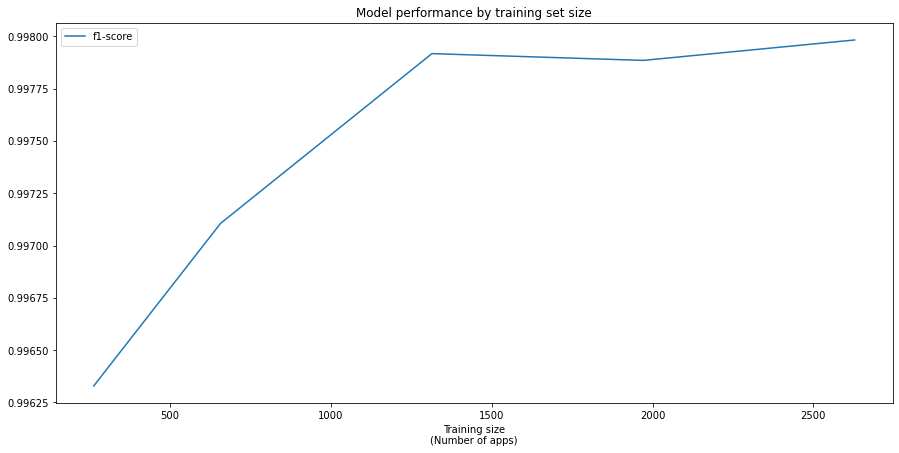

In [14]:
performance_chart.plot(kind='line', 
                       figsize=(15,7), 
                       title="Model performance by training set size",
                       xlabel="Training size\n(Number of apps)"
                      )

In [94]:
for kernel in ['AAT', 'ABAT','APAT']:
    X = sparse.load_npz(os.path.join('data/out/all-apps/hindroid/', kernel+'.npz')).toarray()
#     X_train, X_test, y_train, y_test = X[train_idx], X[test_idx], y[train_idx], y[test_idx]
    model = SVC(kernel='precomputed')  # probably overfit
    model.fit(X, y)

    pred = model.predict(X)
    print(classification_report(y, pred)) # test data
    acc = accuracy_score(y, pred)
    rec = recall_score(y, pred)
    f1 = f1_score(y, pred)
    tn, fp, fn, tp = confusion_matrix(y, pred).ravel()
    print(acc, rec, f1, tp, tn, fp, fn)

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       556
           1       0.99      0.99      0.99      5516

    accuracy                           0.98      6072
   macro avg       0.97      0.93      0.95      6072
weighted avg       0.98      0.98      0.98      6072

0.9835309617918313 0.9949238578680203 0.9909714698447093 5488 484 72 28
              precision    recall  f1-score   support

           0       0.27      0.20      0.23       556
           1       0.92      0.94      0.93      5516

    accuracy                           0.88      6072
   macro avg       0.60      0.57      0.58      6072
weighted avg       0.86      0.88      0.87      6072

0.8763175230566534 0.9441624365482234 0.9327482761708605 5208 113 443 308
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       556
           1       0.99      0.99      0.99      5516

    accuracy                        